## <div align='center'>Лабораторная работа 5</div>



### <div align='center'>Вариант 21</div> 

6.1.21, 6.4.7, 6.8.7, 6.6.21, 6.9.21

Вычислить значение интеграла I = ∫ P (x)dx , где P (x) = ∑c x ,
1
с помощью квадратурных формул трапеций и Симпсона для элементарного
отрезка интегрирования. Оценить величину погрешности. Применяя те же квадратурные формулы для составного отрезка интегрирования, вычислить интеграл I с точностью 0.0001. Предварительно оценить шаг интегрирования, при котором достигается заданная точность.
ПОРЯДОК РЕШЕНИЯ ЗАДАЧИ:
1. Вычислить значение интеграла I аналитически.
2. Задать многочлен Pn ( x) . Вычислить значение интеграла I по формулам трапеций и Симпсона, считая отрезок [1,1.44] элементарным отрезком интегрирования.
3. Найти абсолютные погрешности результатов.
4. Используя выражение для остаточных членов интегрирования (см. ПРИЛОЖЕНИЕ 6.C), оценить шаги интегрирования, при которых величина погрешности каждой квадратурной формулы будет меньше 0.0001.
5. Вычислить значения интеграла по составной квадратурной формуле с найденным шагом (см. ПРИЛОЖЕНИЕ 6.B).
6. Найти абсолютные погрешности результатов.

In [1]:
def p(x):
    return 0.8 + 6.5 * x - 4.4 * x**2 + 6.1 * x**3 - 3.6 * x**4 + 2.4 * x**5

$$ \int _1^{1.44} (0.8 + 6.5 x - 4.4 x^2 + 6.1 x^3 - 3.6 x^4 + 2.4 x^5) dx = 5.38903 $$

In [2]:
import numpy as np
def trapeze_elementary(func, a,b):
    return (b - a ) / 2 * (func(a) + func(b))

def simpsons_elementary (func, a,b):
    return (b - a)/ 6 *(func(a) + func(b) + 4 * func((a + b) / 2))
    

In [3]:
sq_tr, sq_smps = trapeze_elementary(p, 1,1.44), simpsons_elementary(p,1,1.44)
sq_exact = 5.38903
eps_tr, eps_smps = np.abs(sq_exact - sq_tr), np.abs(sq_exact - sq_smps)
print('Trapeze absolute err = ', eps_tr,'Simpsons absolute err =',eps_smps)

Trapeze absolute err =  0.4258975267071987 Simpsons absolute err = 0.0015215151018654893


In [4]:
def p2(x):
    return -8.8  + 36.6 * x  - 43.2 * x**2 + 48 * x**4
def p4(x):
    return  -3.6 * np.math.factorial(4) + 2.4 * np.math.factorial(5) * x

In [5]:
x = np.linspace(1,1.44,100)
import matplotlib.pyplot as plt
plt.plot(x, p2(x));
plt.plot(x, p4(x));
#Многочлен монотононен на данном отрезе - максимум в 1.44

In [6]:
t_eps_tr, t_eps_smps = p2(1.44) * .44**3 / 12, p4(1.44) * .44 **5 / 2880
print('Trapeze theoretical err = ', t_eps_tr,'Simpsons theoretical err =',t_eps_smps)

Trapeze theoretical err =  1.140867140375893 Simpsons theoretical err = 0.0018800449535999995


In [7]:
b, a = 1.44, 1
eps = 1e-4
h_tr, h_smps = np.sqrt(eps * 12 / p2(1.44) /(b - a)), (eps * 2880 / p4(1.44) /(b - a))**.25
print('Trapeze step = ', h_tr,'Simpsons step =',h_smps)

Trapeze step =  0.004119411154856359 Simpsons step = 0.21130541083481116


In [8]:
def trapeze(func,a,b,h):
    n = np.linspace(a,b,np.ceil((b-a)/h).astype('int64'))
    s = 0
    for num, i in enumerate(n[:-1]):
        s += trapeze_elementary(func,n[num],n[num + 1])
    return s

def simpsons(func,a,b,h):
    n = np.linspace(a,b,np.ceil((b-a)/h).astype('int64'))
    s = 0
    for num, i in enumerate(n[:-1]):
        s += simpsons_elementary(func,n[num],n[num + 1])
    return s

In [9]:
sq_tr, sq_smps = trapeze(p, a,b,h_tr), simpsons(p,a,b,h_smps)
sq_exact = 5.38903
eps_tr, eps_smps = np.abs(sq_exact - sq_tr), np.abs(sq_exact - sq_smps)
print('Trapeze absolute err = ', eps_tr,'Simpsons absolute err =',eps_smps)

Trapeze absolute err =  4.2730271269775244e-05 Simpsons absolute err = 9.911266986506462e-05


Задача6.4.
Построить график функции F(x)=∫f(x,t)dt, x1≤x≤x2. Для вычисления интеграла с точностью 10-8 использовать квадратурную формулу, указанную в индивидуальном варианте, и правило Рунге оценки погрешности.
$$ f = sin(t^2 + xt), a=0,b=2, 0<x<2$$
Квадратурная формула - трапеций

In [10]:
eps = 1e-8
a,b = 0,2
h_tr = np.sqrt(eps * 12 / 2 /(b - a))

In [11]:
def f(t,x):
    return np.sin(t**2 + x * t)

In [12]:
def trapeze_elementary_2var(func, a,b,x):
    return (b - a ) / 2 * (func(a,x) + func(b,x))
def trapeze_2var_func(func,a,b,h,x):
    n = np.linspace(a,b,np.ceil((b-a)/h).astype('int64'))
    s = 0
    for num, i in enumerate(n[:-1]):
        s += trapeze_elementary_2var(func,n[num],n[num + 1],x)
    return s

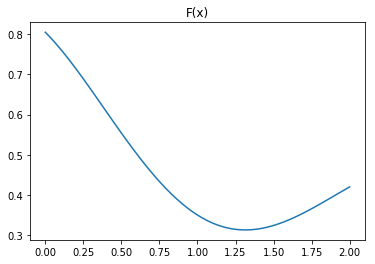

In [13]:
x = np.linspace(a,b,100)
y = trapeze_2var_func(f,a,b,h_tr,x)
plt.plot(x,y);
plt.title('F(x)');

Задача 6.8. Используя указанную в индивидуальном варианте квадратурную 
формулу, вычислить двойной интеграл ∫∫ f (x, y)dxdy от функции двух
переменных f(x,y) по прямоугольной области D={(x,y),x∈[0,2],y∈[0,2]} с точностью 0.001.
$$ f = sin(y^2 + xy)$$
Квадратура - трапеции

In [14]:
def trapeze_2var(func,a,b,h):
    n = np.linspace(a,b,np.ceil((b-a)/h).astype('int64'))
    v = trapeze_2var_func(func,a,b,h,n)
    return h * ( (v[0] + v[-1]) / 2 + v[1:-1].sum())

In [15]:
sq = trapeze_2var(f,a,b,h_tr)
print('Double integral is ', sq)

Double integral is  0.9077075601286632


Задача 6.6. Вычислить значение интеграла I из задачи 6.1, используя квадратурную формулу Гаусса с одним, двумя, тремя, четырьмя узлами (см. ПРИЛОЖЕНИЕ 6.C). Определить абсолютную погрешность результата. Построить гистограмму зависимости погрешности от числа узлов. Убедиться, что квадратурные формулы Гаусса с N+1 (N=0,1,2,3) узлом точны для многочленов 1, t,...,tm, где m=2N+1.

In [16]:
def gauss(func, a,b, nodes = 1):
    if nodes == 1:
        t = [0]
        A = [2]
    elif nodes == 2:
        t = [-0.577350269189626, 0.577350269189626]
        A = [1,1]
    elif nodes == 4:
        t = [-0.861136311594052, -0.339981043584856,0.339981043584856, 0.861136311594052]
        A = [0.347854845137454, 0.652145154862546, 0.652145154862546,0.347854845137454]
    elif nodes == 3:
        t = [-0.77459666929954,0.00000000000000, 0.77459666929954]
        A = [0.55555555555556, 0.88888888888888, 0.55555555555556]
    else:
        return None
    s = 0
    for i in range(len(t)):
        s += A[i] * func((b + a) / 2 + (b - a) / 2 * t[i])
    s *= (b-a) / 2
    return s

In [17]:
def line(x0):
    return x0

def poisson(x):
    return np.exp(-x**2)

gauss(p,1,1.44,4)

5.389034285841065

5.1783635092992
5.388022799667198
5.389034285872989
5.389034285841065


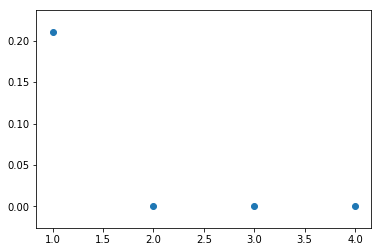

In [18]:
err_gauss = []
sq_exact = 5.389034285841067
for i in range(1,5):
    sq_gauss = gauss(p,1,1.44,i)
    print(sq_gauss)
    err_gauss.append(np.abs(sq_gauss - sq_exact))
plt.scatter(range(1,5),err_gauss)

Задача 6.9. Для интегрального уравнения
b y(x)−λ∫k(x,t)y(t)dt= f(x)
a
составить таблицу значений решения с тремя верными значащими цифрами с постоянным шагом h=(b−a)/10, используя указанную в индивидуальном варианте квадратурную формулу. Построить график решения.
$$ y(x) - 0.25 \int _0 ^1 \frac{y(t)}{5x + t + 2}dt = e^{-x}$$
$$ [a,b] =[0,1]$$
Квадратуры Симпсона

In [19]:
def ker(x,t):
    return -0.25 / (5 * x + 2 + t)
h = 0.1
a = 0
b = 1

In [20]:
#Составим матрицу соответсущую системе
t = np.linspace(a, b, 21)
n = 21
A = np.eye(n)

for i in range(n):
    for k in range(n):
        if k == 0 or k == n-1:
            A[i][k] = h / 6 * ker(t[i],t[k])
        elif k % 2 == 1:
            A[i][k] = h / 6 * 4 * ker(t[i],t[k])
        else:
            A[i][k] = h / 6 * 2 * ker(t[i],t[k])
f = np.exp(-t)
A += np.eye(n)
y = np.linalg.solve(A,f)

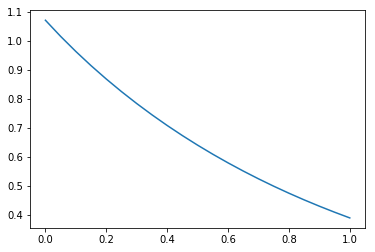

In [25]:
plt.plot(t,y);